In [2]:
datapath = "../data"

# Process the tissue attributes
In this code we load tissue gene attributes by several datafiles. We apply missing values fixing and data scaling with `sklearn.preprocessing.StandardScaler` on the `BIO` and `CCcfs` attributes, while no normalization and fixing on embedding attributes (`EmbN2V_128`). The attributes are all merged in one matrix by the `feature_assemble` function as input for the prediction model building.

In [3]:
pd.read_csv(os.path.join(datapath,"Lung_HELP.csv"), index_col=0).value_counts(normalize=False)

label
sNE      13847
aE        2849
E         1235
Name: count, dtype: int64

In [7]:
tissue='Lung'
import pandas as pd
from help.preprocess.loaders import feature_assemble
import os
label_file = os.path.join(datapath, f'{tissue}_HELP.csv')
features = [{'fname': os.path.join(datapath, f'{tissue}_BIO.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_CCcfs.csv'), 'fixna' : True, 'normalize': 'std'},
            {'fname': os.path.join(datapath, f'{tissue}_EmbN2V_128.csv'), 'fixna' : None, 'normalize': None}]
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=False, seed=1, saveflag=False, verbose=True)
pd.merge(df_X, df_y, left_index=True, right_index=True, how='outer')

Loading ../data/Lung_HELP.csv
Majority sNE 13847 minoriy E 1235
[Lung_BIO.csv] found 0 Nan...
[Lung_BIO.csv] Normalization with std ...
[Lung_CCcfs.csv] found 0 Nan...
[Lung_CCcfs.csv] Normalization with std ...
[Lung_EmbN2V_128.csv] No normalization...
16249 labeled genes over a total of 17931
(16249, 3454) data input


,Transcript count,GC content,GTEX_lung,Gene_Disease association,OncoDB_expression,HPA_lung,GO-MF,GO-BP,GO-CC,BIOGRID,...,Node2Vec_119,Node2Vec_120,Node2Vec_121,Node2Vec_122,Node2Vec_123,Node2Vec_124,Node2Vec_125,Node2Vec_126,Node2Vec_127,label
A1BG,0.026042,0.661529,1.901324e-04,0.005882,0.520008,0.000005,0.113636,0.000132,0.132075,0.009895,...,-0.263569,0.239637,-1.063556,0.158509,-0.869080,-0.606373,1.092688,0.314843,-0.099810,sNE
A1CF,0.052083,0.429638,6.512609e-07,0.026471,0.520008,0.000000,0.090909,0.045918,0.113208,0.009895,...,0.673553,1.394478,0.040143,0.391288,-0.520452,0.065344,0.055139,0.501500,-0.632607,sNE
A2M,0.067708,0.440782,1.458404e-01,0.076471,0.346661,0.073243,0.318182,0.061224,0.094340,0.050093,...,-0.883007,0.597307,0.868068,-0.450582,-0.857399,0.101487,0.358412,-0.078484,-0.339488,sNE
A2ML1,0.046875,0.524363,5.367602e-06,0.020588,0.737440,0.000005,0.090909,0.010204,0.056604,0.037415,...,0.267944,0.006263,0.098736,0.345666,-0.238830,-0.433466,-0.496542,-0.047550,-0.364791,sNE
A3GALT2,0.005208,0.642442,1.192866e-05,0.011765,0.520008,0.000000,0.090909,0.020408,0.075472,0.000309,...,-0.025655,-0.134439,-0.013893,-0.256500,0.085903,-0.218200,-0.112388,0.313667,-0.228946,sNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.015625,0.516420,2.468029e-06,0.000000,0.536224,0.000000,0.022727,0.000000,0.018868,0.006184,...,0.002381,0.472492,0.201496,-0.002056,0.108134,-0.164981,0.231453,-0.250403,0.314670,sNE
ZYG11B,0.010417,0.489508,4.800479e-04,0.005882,0.491584,0.000413,0.022727,0.010204,0.018868,0.028139,...,-0.531551,-0.327476,-0.333261,-0.137215,0.157442,-0.298281,0.299088,0.416887,-0.110293,aE
ZYX,0.052083,0.687137,1.821237e-02,0.023529,0.474108,0.004221,0.068182,0.040816,0.169811,0.096166,...,-0.448981,-0.446795,-0.674799,0.868887,0.525818,-0.765959,0.073134,0.498463,-1.084493,sNE
ZZEF1,0.057292,0.527445,1.005300e-03,0.014706,0.478658,0.000494,0.113636,0.000584,0.132075,0.041126,...,0.594624,0.118834,-0.934788,0.079588,-0.095489,-0.624066,1.563151,-0.410263,0.980991,aE


# Prediction
We process k-fold cross validation of a LightGBM classifier (`n_splits=5`), and then storing predictions and printing metrics.

,measure
ROC-AUC,0.8291±0.0101
Accuracy,0.7787±0.0077
BA,0.6384±0.0120
Sensitivity,0.7264±0.0300
Specificity,0.7546±0.0427
MCC,0.4251±0.0148
CM,"[[779, 294, 85], [308, 953, 1317], [216, 1376,..."


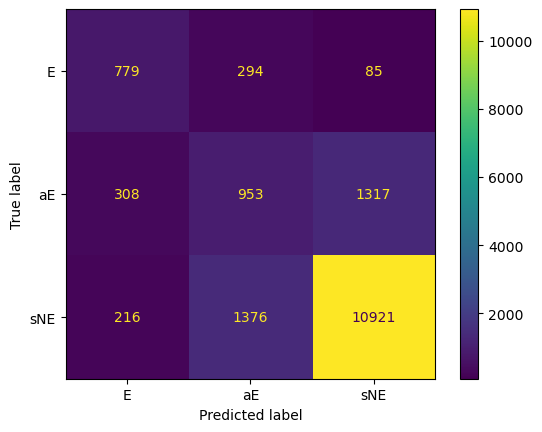

In [8]:
from help.models.prediction import predict_cv
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means

# Prediction with undersampling
Due to the strong unbalancing between the two classes, we can redo prediction model building by undersampling the majority class: this is done by re-applying the `feature_assemble` function with parameter `subsample=True`: this flag set causes the majority class to be downsampled to 4 times the dimension of the minority class. The we re-apply the k-fold cross validation of the a LightGBM classifier.

Loading ../data/label_Kidney.csv
Majority NE 16678 minoriy E 1253
[Kidney_BIO.csv] found 0 Nan...
[Kidney_BIO.csv] Normalization with std ...
[Kidney_CCcfs.csv] found 0 Nan...
[Kidney_CCcfs.csv] Normalization with std ...
[Kidney_EmbN2V_128.csv] No normalization...
6043 labeled genes over a total of 6265
(6043, 3459) data input


5-fold: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]


,measure
ROC-AUC,0.9534±0.0032
Accuracy,0.9136±0.0097
BA,0.8689±0.0213
Sensitivity,0.7930±0.0425
Specificity,0.9448±0.0060
MCC,0.7361±0.0329
CM,"[[985, 257], [265, 4536]]"


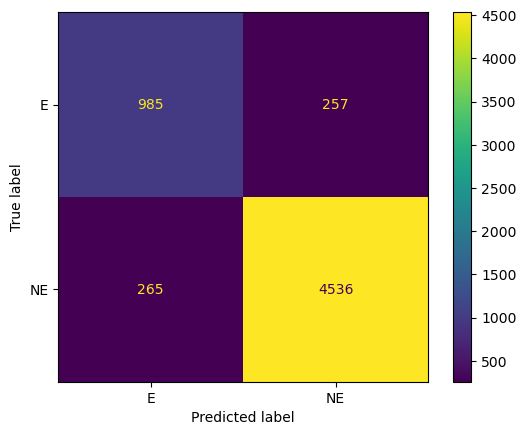

In [10]:
df_X, df_y = feature_assemble(label_file = label_file, 
                              features=features, subsample=True, seed=1, verbose=True)
df_scores_means, df_scores = predict_cv(df_X, df_y, n_splits=5, balanced=True, display=True, outfile='pred_Kidney.csv')
df_scores_means